<a href="https://colab.research.google.com/github/imbrem/fun-with-embedding/blob/main/Fun_with_Sentence_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Hugging Face's state-of-the-art framework for embeddings
!pip install sentence_transformers
# For exploring high-dimensional data
!pip install sklearn
# For plotting
!pip install matplotlib
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.7 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=6330c3a761bb0a30e6656e2671b3788941f15e5d769c7e3029684e36ab34b223
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: T

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
encoded = model.encode([
    "Using this model is as easy as passing in an array of strings!",
    "Each string is converted to an embedding vector, and the whole result is returned as a numpy array.",
])

In [ ]:
import numpy as np
import math

for vec in encoded:
  assert math.isclose(np.linalg.norm(encoded[0]), 1.0)

In [ ]:
import requests

response = requests.get("https://raw.githubusercontent.com/imbrem/fun-with-embedding/main/facts.json")
facts = response.json()

In [ ]:
embeddings = {
    topic: model.encode(sentences) for topic, sentences in facts.items()
}

In [ ]:
embedding_list = np.array([embedding
             for embeddings in embeddings.values()
             for embedding in embeddings])
topics = np.array([topic
          for (topic, sentences) in facts.items()
          for _ in sentences])

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=23)
vis_dims = tsne.fit_transform(embedding_list)

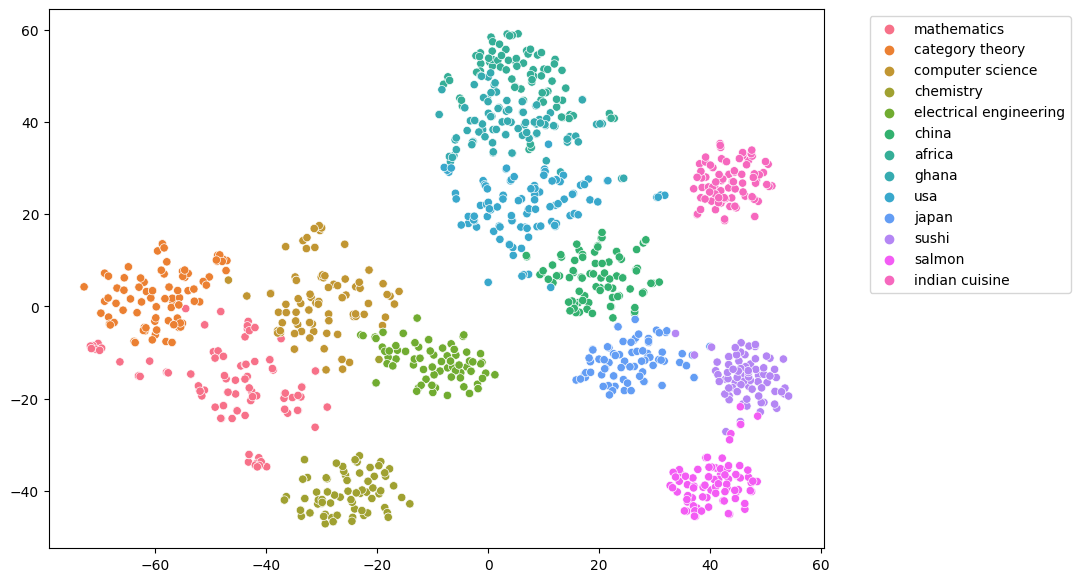

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.scatterplot(x=vis_dims[:, 0], y=vis_dims[:, 1], hue=topics)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

def svc_accuracy(p_train: float, random_state=23, print_acc=True):
  # Randomly partition our data into a training and testing set
  X_train, X_test, y_train, y_test = train_test_split(
      embedding_list,
      topics,
      test_size=1.0 - p_train,
      random_state=random_state)
  # Train an SVM with a linear kernel to do classification
  # `C` here is the *regularization parameter*, which determines
  # the trade-off between minimizing classification error on the
  # training data and achieving a wide margin between the classes
  # to be separated (in embedding space), which tends to lead to
  # better generalization.
  clf = SVC(kernel='linear', C=1)
  clf.fit(X_train, y_train)

  # Predict on the test set
  y_pred = clf.predict(X_test)

  # Compute how well we did
  accuracy = accuracy_score(y_test, y_pred)
  if print_acc:
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
  return accuracy

In [ ]:
svc_accuracy(0.8)

Accuracy: 0.9791666666666666
                        precision    recall  f1-score   support

                africa       0.92      1.00      0.96        11
       category theory       1.00      1.00      1.00        30
             chemistry       1.00      1.00      1.00        20
                 china       1.00      1.00      1.00        17
      computer science       0.96      1.00      0.98        26
electrical engineering       1.00      0.94      0.97        17
                 ghana       1.00      0.89      0.94        19
        indian cuisine       1.00      1.00      1.00        13
                 japan       1.00      0.95      0.98        22
           mathematics       1.00      1.00      1.00        16
                salmon       1.00      0.94      0.97        17
                 sushi       0.91      1.00      0.95        10
                   usa       0.92      1.00      0.96        22

              accuracy                           0.98       240
         

0.9791666666666666

In [ ]:
svc_accuracy(0.1)

Accuracy: 0.9424326833797586
                        precision    recall  f1-score   support

                africa       0.78      0.97      0.86        75
       category theory       1.00      1.00      1.00       113
             chemistry       1.00      0.97      0.99        79
                 china       0.88      0.99      0.93        71
      computer science       0.85      0.99      0.92        95
electrical engineering       0.97      0.88      0.93        85
                 ghana       1.00      0.83      0.91        83
        indian cuisine       0.94      1.00      0.97        74
                 japan       1.00      0.99      0.99        73
           mathematics       0.94      0.91      0.93        89
                salmon       0.99      0.97      0.98        75
                 sushi       0.97      0.94      0.95        67
                   usa       1.00      0.83      0.91        98

              accuracy                           0.94      1077
         

0.9424326833797586

100%|██████████| 89/89 [01:04<00:00,  1.39it/s]


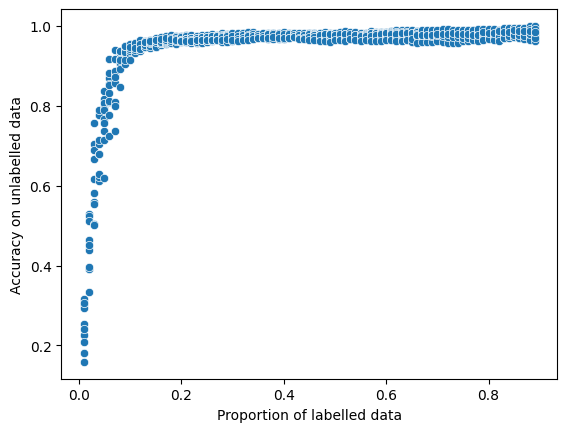

In [ ]:
from tqdm import tqdm
points = np.array([
    [prop, svc_accuracy(prop, random_state=state, print_acc=False)]
    for prop in tqdm(np.arange(0.01, 0.9, 0.01))
    for state in range(10, 20)
])
sns.scatterplot(x=points[:, 0], y=points[:, 1])
plt.xlabel("Proportion of labelled data")
plt.ylabel("Accuracy on unlabelled data")
plt.show()

[]

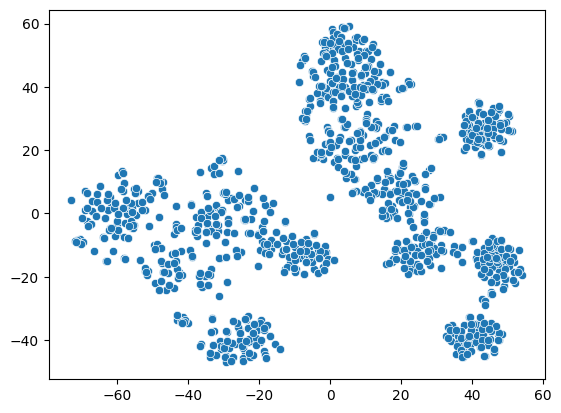

In [ ]:
sns.scatterplot(x=vis_dims[:, 0], y=vis_dims[:, 1])
plt.plot()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,
                n_init=10,
                init='k-means++',
                random_state=23).fit(embedding_list)

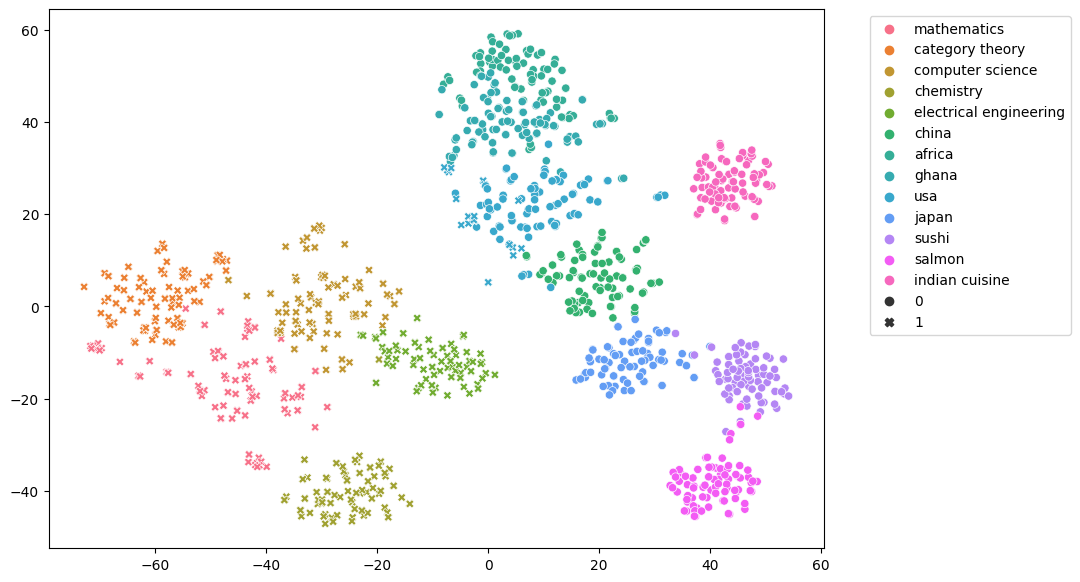

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=vis_dims[:, 0], y=vis_dims[:, 1], hue=topics, style=kmeans.labels_)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

[]

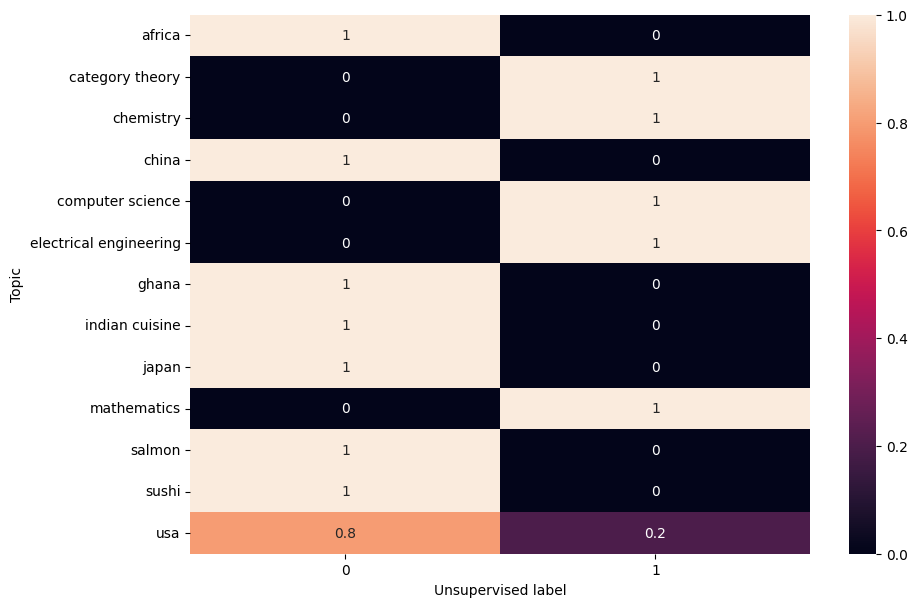

In [ ]:
import pandas as pd
contingency_table = pd.crosstab(topics, kmeans.labels_)
contingency_prop = contingency_table.div(contingency_table.sum(axis=1),
                                         axis=0)
plt.figure(figsize=(10, 7))
sns.heatmap(contingency_prop, annot=True)
plt.xlabel("Unsupervised label")
plt.ylabel("Topic")
plt.plot()

In [ ]:
sentences = np.array([sentence
          for sentences in facts.values()
          for sentence in sentences])
sentences[(topics == "usa") & (kmeans.labels_ == 1)]

array(['It is a federal republic with a president serving as both the head of state and the head of government.',
       'The American Civil War, fought from 1861 to 1865, resulted in the abolition of slavery and preserved the Union.',
       'The Civil Rights Movement in the 1950s and 1960s aimed to end racial segregation and discrimination in the United States.',
       'It is also a major hub for scientific research, with numerous Nobel laureates and advancements in various fields.',
       'The American legal system is based on common law, with a judicial branch that interprets and enforces the law.',
       'The country has a two-party political system, with the Democratic and Republican parties being the two major political parties.',
       'The United States has a robust space exploration program, with NASA conducting missions to explore the solar system and beyond.',
       "The country's legal system is based on English common law, with both federal and state courts.",
      

[]

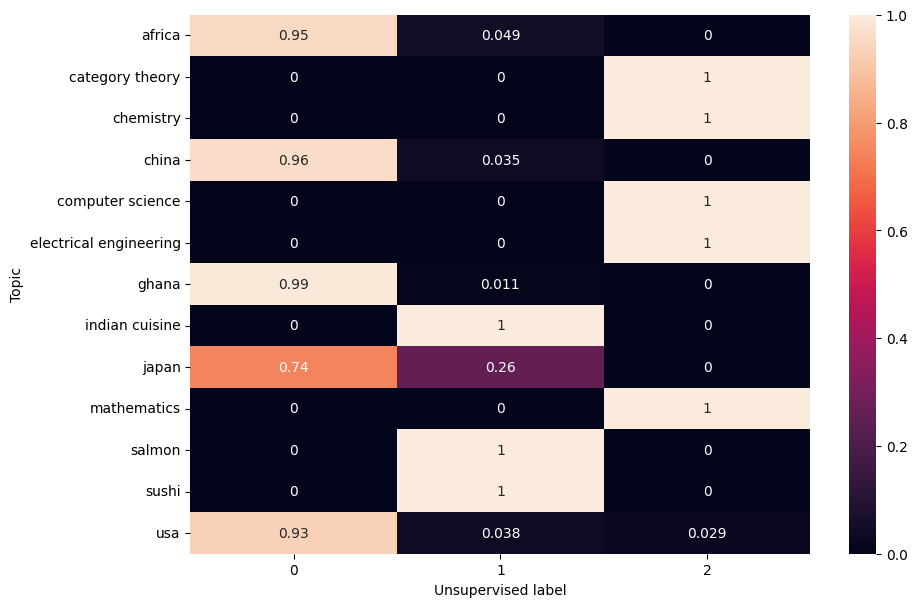

In [ ]:
kmeans = KMeans(n_clusters=3,
                n_init=10,
                init='k-means++',
                random_state=23).fit(embedding_list)
contingency_table = pd.crosstab(topics, kmeans.labels_)
contingency_prop = contingency_table.div(contingency_table.sum(axis=1),
                                         axis=0)
plt.figure(figsize=(10, 7))
sns.heatmap(contingency_prop, annot=True)
plt.xlabel("Unsupervised label")
plt.ylabel("Topic")
plt.plot()

In [ ]:
sentences[(topics == "japan") & (kmeans.labels_ == 1)]

array(['Japanese cuisine is celebrated worldwide, with dishes like sushi, sashimi, tempura, and ramen gaining international popularity.',
       'Traditional Japanese tea ceremonies are a significant cultural practice, emphasizing mindfulness and etiquette.',
       'Japanese traditional clothing includes the kimono, yukata, and hakama, each worn for specific occasions.',
       'Japanese cuisine is known for its use of fresh and seasonal ingredients, and kaiseki is a traditional multi-course dining experience.',
       'Rice, seafood, and vegetables are staples in Japanese cuisine, and sake is a popular traditional rice wine.',
       'Traditional Japanese music includes instruments like the shamisen, koto, and shakuhachi, creating melodies that evoke nature and emotion.',
       'The Japanese tea ceremony, known as chanoyu or sadō, involves precise rituals and aesthetics related to the preparation and consumption of tea.',
       'Japanese pop culture includes J-pop music, fashion tr

[]

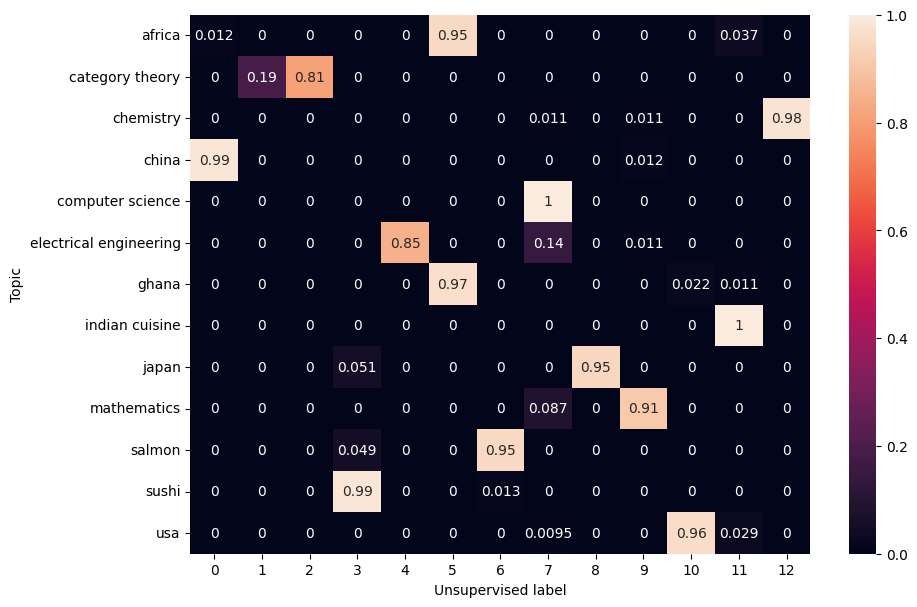

In [ ]:
kmeans = KMeans(n_clusters=13,
                n_init=10,
                init='k-means++',
                random_state=23).fit(embedding_list)
contingency_table = pd.crosstab(topics, kmeans.labels_)
contingency_prop = contingency_table.div(contingency_table.sum(axis=1),
                                         axis=0)
plt.figure(figsize=(10, 7))
sns.heatmap(contingency_prop, annot=True)
plt.xlabel("Unsupervised label")
plt.ylabel("Topic")
plt.plot()

In [ ]:
sentences[kmeans.labels_ == 1]

array(['A category is a collection of objects and morphisms (arrows) that satisfy certain axioms, including identity and composition properties.',
       'Functors are mappings between categories that preserve the structure of objects and morphisms, allowing for comparisons between categories.',
       'Natural transformations are morphisms between functors, representing transformations between mathematical structures.',
       'Monoids, groups, and rings can be viewed as categories with a single object, where morphisms correspond to elements and operations.',
       'The Yoneda lemma is a fundamental result in category theory that relates objects to functors and provides insights into the structure of categories.',
       'In category theory, products and coproducts are used to define universal constructions and represent objects in terms of other objects.',
       'The concept of an adjunction is used in category theory to describe relationships between functors that have a certain d

[]

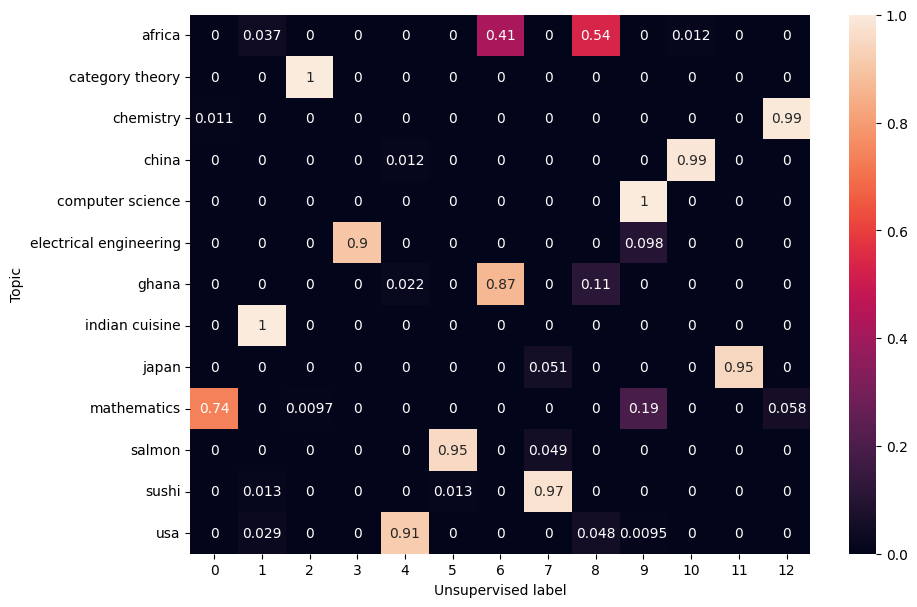

In [ ]:
kmeans = KMeans(n_clusters=13,
                n_init=10,
                init='k-means++',
                random_state=24).fit(embedding_list)
contingency_table = pd.crosstab(topics, kmeans.labels_)
contingency_prop = contingency_table.div(contingency_table.sum(axis=1),
                                         axis=0)
plt.figure(figsize=(10, 7))
sns.heatmap(contingency_prop, annot=True)
plt.xlabel("Unsupervised label")
plt.ylabel("Topic")
plt.plot()

[]

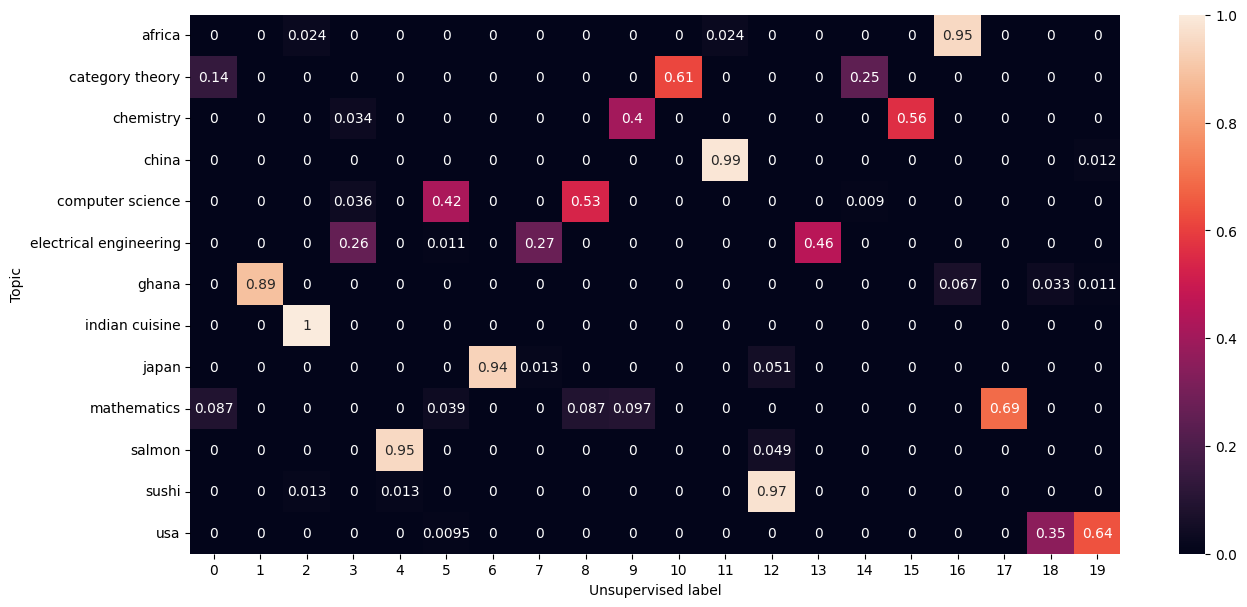

In [ ]:
kmeans = KMeans(n_clusters=20,
                n_init=10,
                init='k-means++',
                random_state=24).fit(embedding_list)
contingency_table = pd.crosstab(topics, kmeans.labels_)
contingency_prop = contingency_table.div(contingency_table.sum(axis=1),
                                         axis=0)
plt.figure(figsize=(15, 7))
sns.heatmap(contingency_prop, annot=True)
plt.xlabel("Unsupervised label")
plt.ylabel("Topic")
plt.plot()

In [ ]:
sentences[kmeans.labels_ == 3]

array(['Computer architecture involves the design of computer systems, including processors, memory, and input/output devices.',
       'The field of robotics involves the design and development of machines that can perform tasks autonomously or with human guidance.',
       'Virtual reality (VR) and augmented reality (AR) technologies create immersive and interactive computer-generated environments.',
       'Virtual reality (VR) and augmented reality (AR) technologies create immersive and interactive computer-generated environments.',
       'Nanotechnology involves the manipulation of matter at the nanoscale (1 to 100 nanometers) and has applications in various fields, including medicine and electronics.',
       'The Haber-Bosch process is a significant industrial application of chemistry, used to produce ammonia for fertilizers.',
       'The Haber-Bosch process is a significant industrial application of chemistry, used to produce ammonia for fertilizers.',
       'The field of el

In [ ]:
sentences[kmeans.labels_ == 7]

array(['Electricity is a fundamental form of energy that powers a wide range of devices and systems in modern society.',
       'The invention of the electric battery by Alessandro Volta in the late 18th century marked a significant milestone in the development of electrical engineering.',
       "Ohm's Law, formulated by Georg Simon Ohm, describes the relationship between voltage, current, and resistance in electrical circuits.",
       'Electromagnetic theory, developed by James Clerk Maxwell, forms the basis for understanding the behavior of electromagnetic waves and fields.',
       'Electromagnetic interference (EMI) is a challenge in electrical engineering, as it can disrupt the operation of electronic devices.',
       'Power electronics deals with the conversion and control of electrical energy, often found in devices like power inverters and motor drives.',
       'Power distribution systems deliver electricity from power plants to homes, businesses, and industries through a n

In [ ]:
sentences[kmeans.labels_ == 14]

array(['Category theory has applications in computer science, where it is used to study programming languages, type theory, and functional programming.',
       'The notion of a monad, often used in functional programming, is a construct from category theory that represents computations and sequencing.',
       'In functional programming, category theory concepts like monads, functors, and applicatives provide a foundation for building composable software.',
       'In type theory, a category of types and type constructors can be used to formalize the foundations of programming languages.',
       'Category theory is often used to study properties of universal constructions, such as limits and colimits.',
       'The categorical notion of a monad is used to model side effects and state in functional programming languages.',
       'Category theory concepts, like monoids and groups, can be applied to the study of automata and formal languages.',
       'Category theory concepts like col